In [48]:
import importlib
import sys
import logging as log

import pandas as pd

import consts
import data_analysis
import eda_background_math_verbal_py as eda
import data_tools
import graphs



# Reload if you edited files without restarting kernel
importlib.reload(eda)
importlib.reload(data_analysis)
importlib.reload(data_tools)
importlib.reload(graphs)
importlib.reload(consts)


<module 'consts' from 'D:\\Degree\\Semester 3\\Python\\final proj\\final-project\\consts.py'>

In [46]:
# --------- CONFIG ----------
CSV_PATH = "main_dataset.csv"
# ---------------------------
log.basicConfig(
    level=log.INFO,
    format='%(levelname)s: %(message)s',
    stream=sys.stdout  # This forces it to the standard output
)

In [3]:
# load the data
df = data_tools.load_main_dataset(CSV_PATH)
eda_df = eda.create_eda_subset(df)
bias_df = pd.read_csv('analysis_results_full.csv')

In [4]:
result = data_analysis.compute_bias_correlation(bias_df)

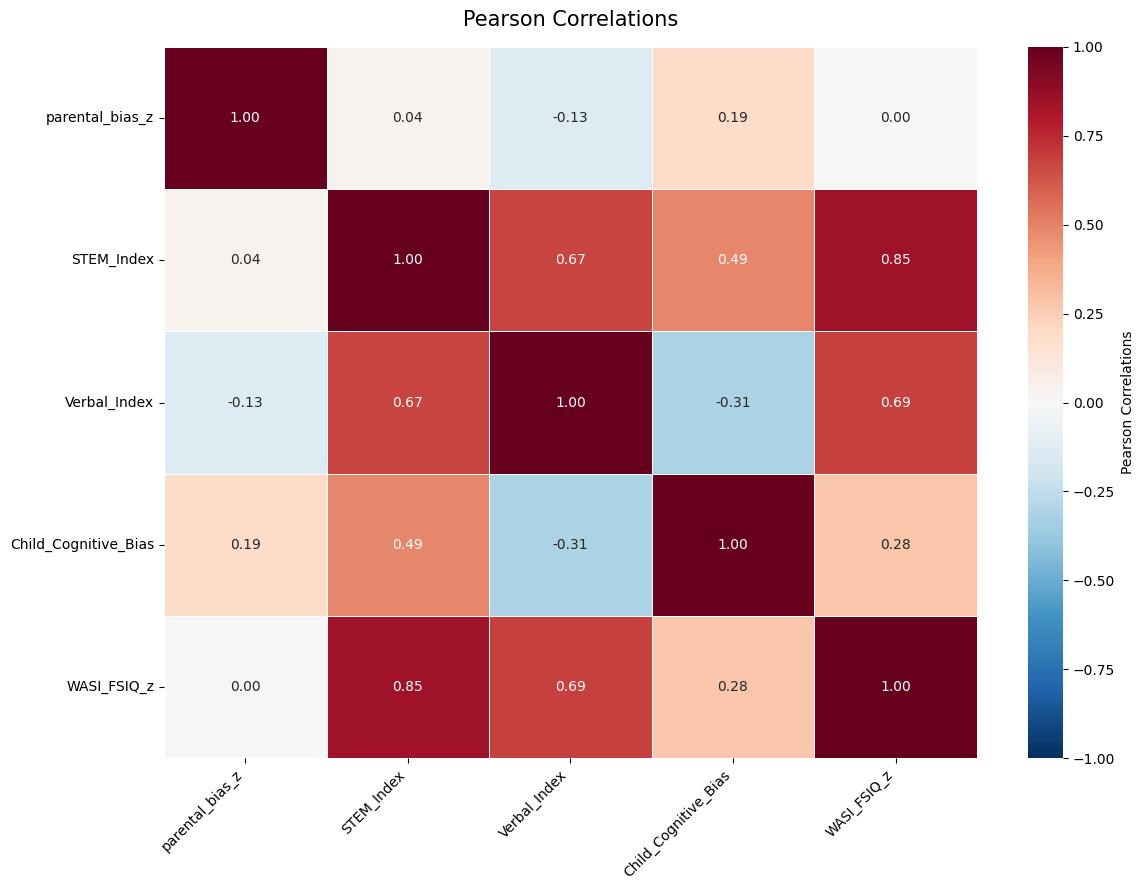

In [5]:
graphs.plot_correlation_heatmap(result, title="Pearson Correlations")

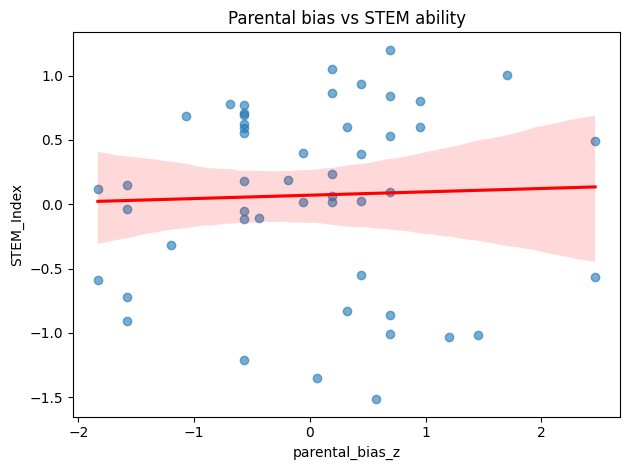

In [6]:
graphs.bias_vs_stem(bias_df)

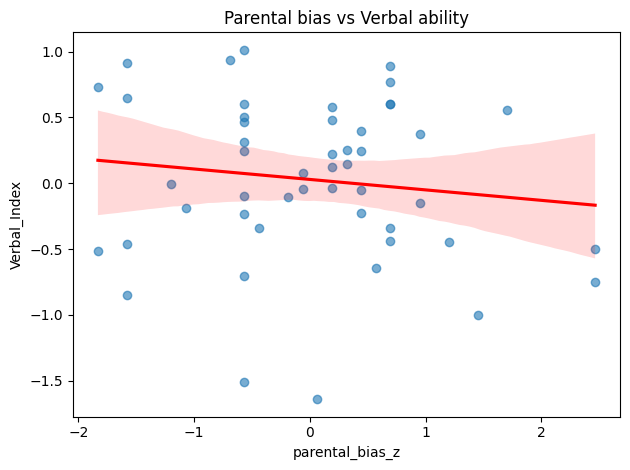

In [7]:
graphs.bias_vs_verbal(bias_df)

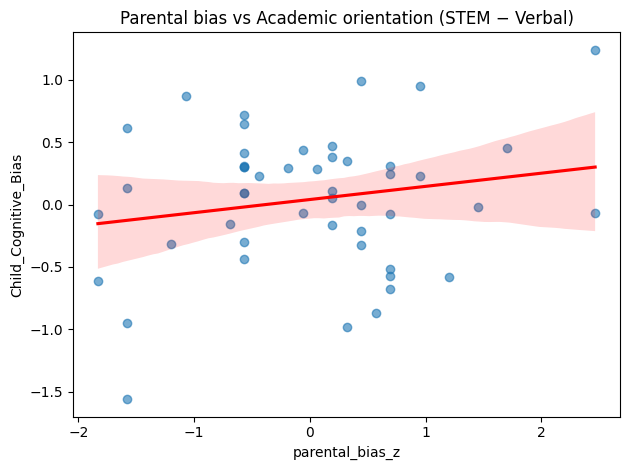

In [8]:
graphs.bias_vs_academic(bias_df)

## Show spearman correlation between parents grades (HG = Highest Grade) to child's grade

In [9]:
corr = eda.preprocess_and_compute_correlations(eda_df)
print("Spearman correlation (numeric vars):")
corr.round(2)

Spearman correlation (numeric vars):


,mother_HG,father_HG,regular_classroom,math,verbal,memory
mother_HG,1.00,0.56,0.10,0.22,0.29,0.16
father_HG,0.56,1.00,0.25,0.48,0.30,0.32
regular_classroom,0.10,0.25,1.00,0.09,0.05,0.18
math,0.22,0.48,0.09,1.00,0.52,0.47
verbal,0.29,0.30,0.05,0.52,1.00,0.74
memory,0.16,0.32,0.18,0.47,0.74,1.00


## Correlation matrix (numeric vars)

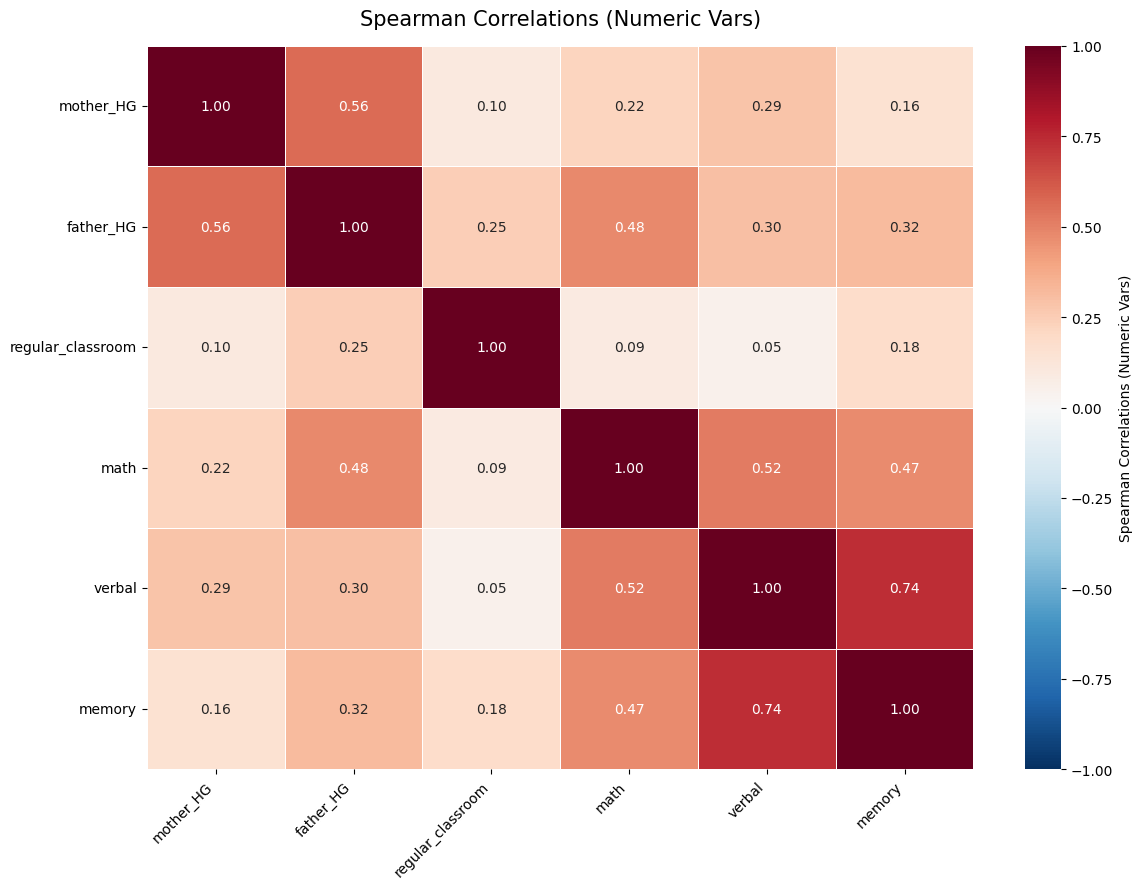

In [10]:
graphs.plot_correlation_heatmap(corr, title="Spearman Correlations (Numeric Vars)")

In [11]:
# Verbal-only correlations
verbal_corr = eda.verbal_correlation(eda_df)
print("\nSpearman correlation (Parental education + VIQ):")
print(verbal_corr.round(2))


Spearman correlation (Parental education + VIQ):
           mother_HG  father_HG  verbal
mother_HG       1.00       0.56    0.29
father_HG       0.56       1.00    0.30
verbal          0.29       0.30    1.00


## Scatter plots

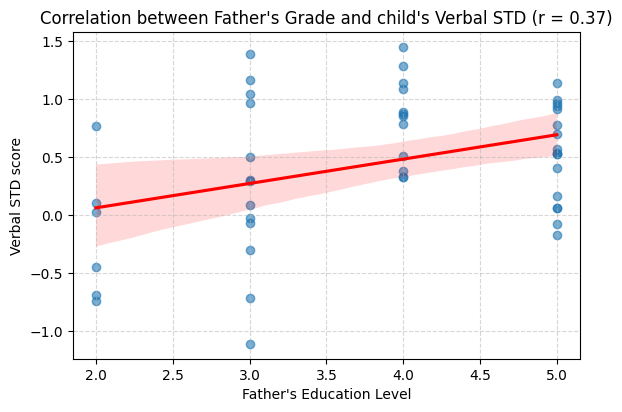

In [12]:
graphs.father_education_verbal(eda_df)

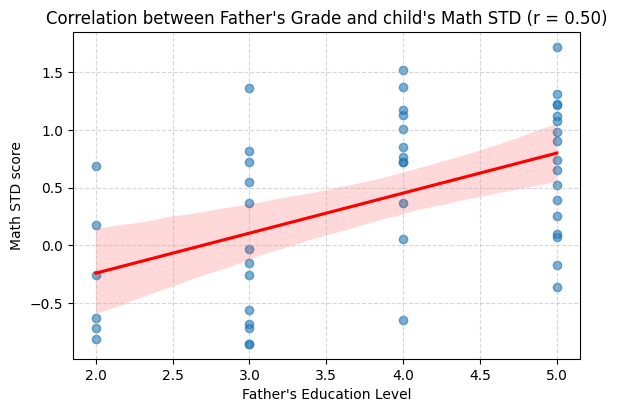

In [13]:
graphs.father_education_math(eda_df)

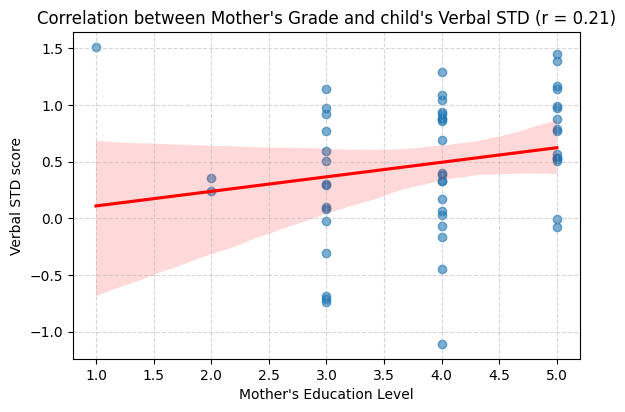

In [14]:
graphs.mother_education_verbal(eda_df)

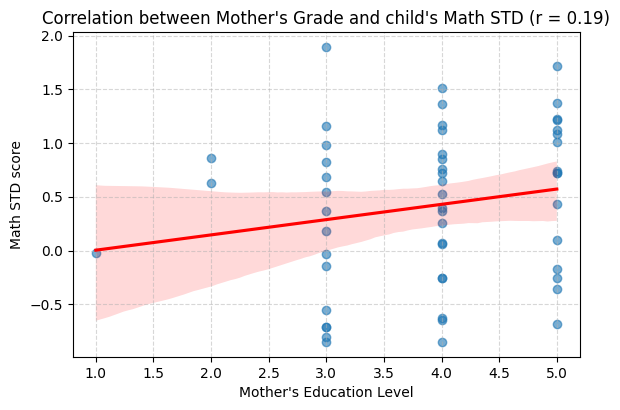

In [15]:
graphs.mother_education_math(eda_df)

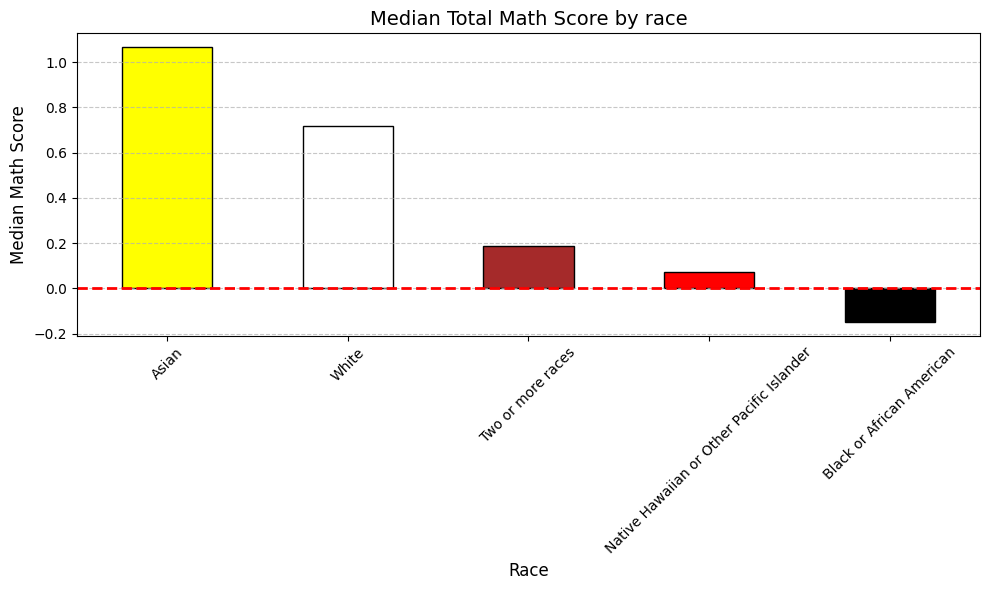

In [16]:
graphs.race_correlation(df)

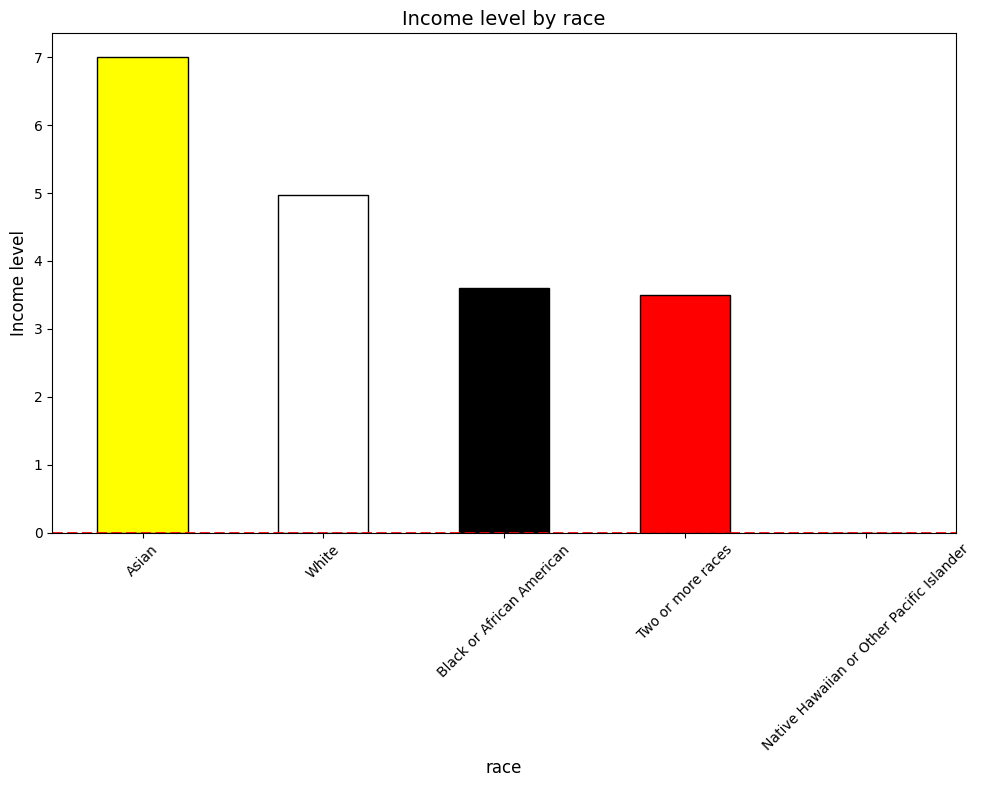

In [17]:
graphs.mother_income_correlation(df)

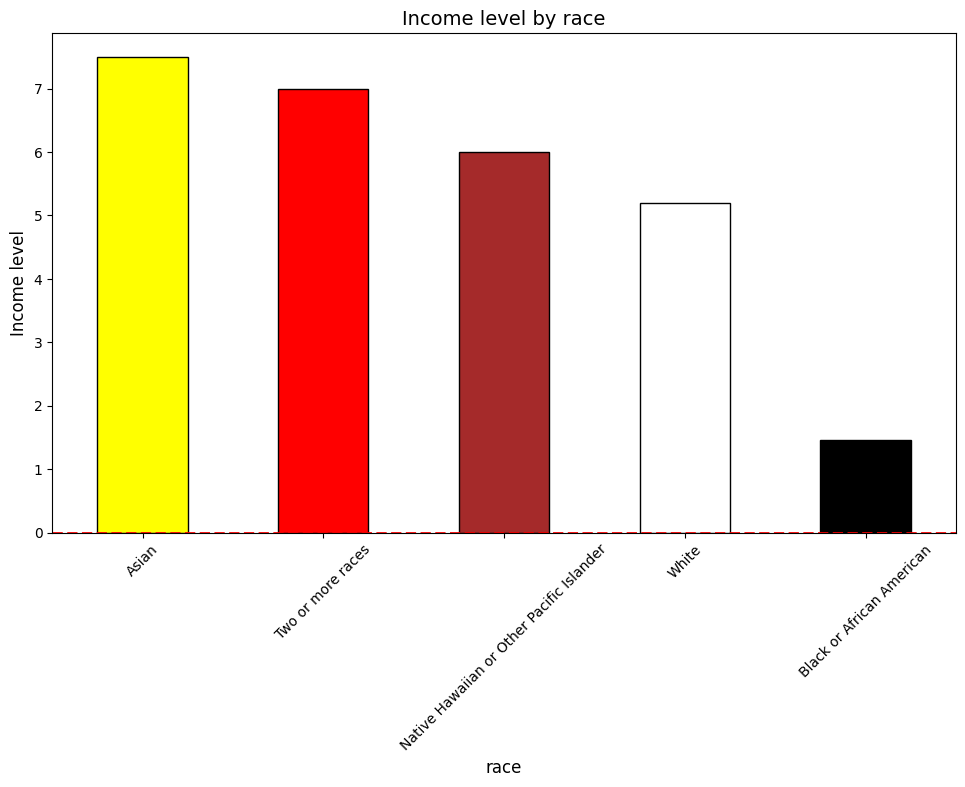

In [18]:
graphs.father_income_correlation(df)

In [47]:
graphs.stage_a(df)

INFO:                             OLS Regression Results                            
Dep. Variable:       total_math_score   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     14.82
Date:                Wed, 14 Jan 2026   Prob (F-statistic):           7.74e-06
Time:                        19:24:05   Log-Likelihood:                -48.507
No. Observations:                  56   AIC:                             103.0
Df Residuals:                      53   BIC:                             109.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0694 

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Yair\AppData\Local\Programs\Python\Python310\lib\logging\__init__.py", line 1100, in emit
    msg = self.format(record)
  File "C:\Users\Yair\AppData\Local\Programs\Python\Python310\lib\logging\__init__.py", line 943, in format
    return fmt.format(record)
  File "C:\Users\Yair\AppData\Local\Programs\Python\Python310\lib\logging\__init__.py", line 678, in format
    record.message = record.getMessage()
  File "C:\Users\Yair\AppData\Local\Programs\Python\Python310\lib\logging\__init__.py", line 368, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\Yair\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Yair\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Yair

In [21]:
graphs.stage_b(df)

In [ ]:
graphs.hierarchial_model(df)

In [ ]:
graphs.residuals_graph(df)

In [ ]:
graphs.residuals_distribution_graph(df)

In [ ]:
graphs.residuals_plot(df)

In [ ]:
graphs.influence_plot(df)